In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
visa_df=pd.read_csv(r'D:\Rachna\practice\Datafiles\Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Box plot**

- box plot is used for detecting outliers
- box plot has minimum value q1 q2 q3 and maximum value
- inside box plot red line represents median which is 50%

**Outlier**

- very huge or very small observation which pulls data in any side of distribution
- Mild outliers
    - q1-1.5IQR  and q3+1.5IQR
- Strong outliers
    - q1-3IQR  and q3+3IQR
      
- IQR : inter quantile range
    - IQR=Q3-Q1

- q1:25p
- q2:50p
- q3:75p

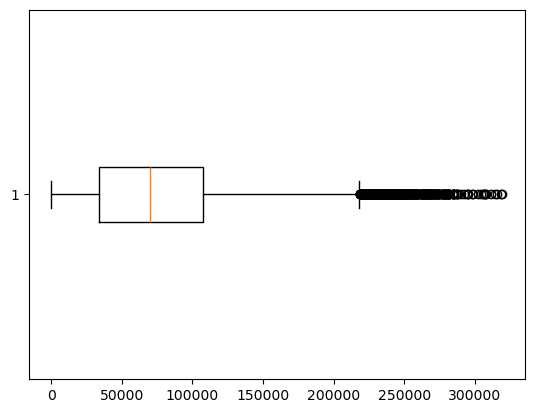

In [5]:
plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

<Axes: >

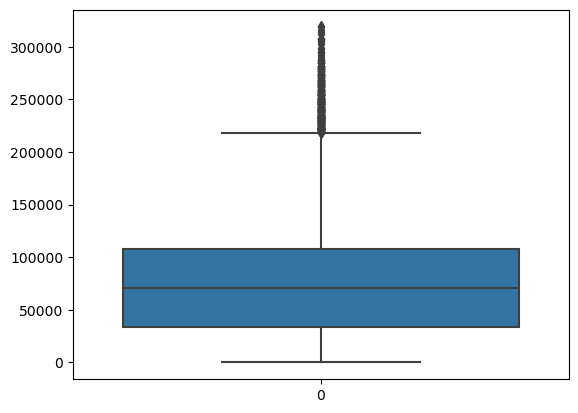

In [9]:
sns.boxplot(visa_df['prevailing_wage'])         

C:\Users\rachn\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

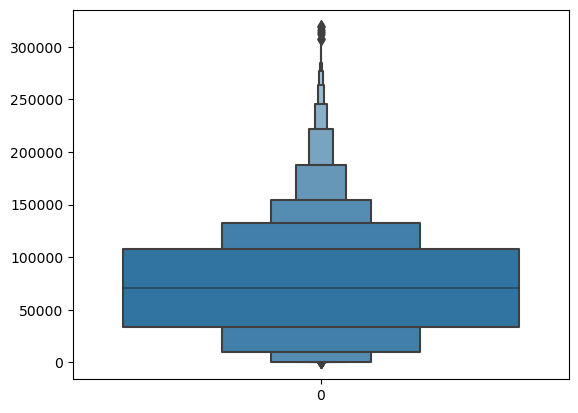

In [10]:
sns.boxenplot(visa_df['prevailing_wage'])         

<Axes: >

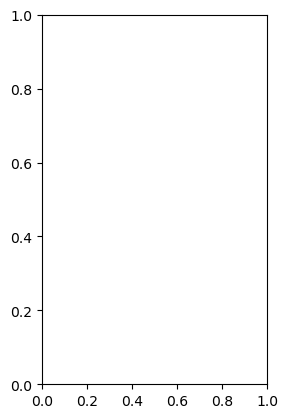

In [12]:
plt.subplot(1,2,1)

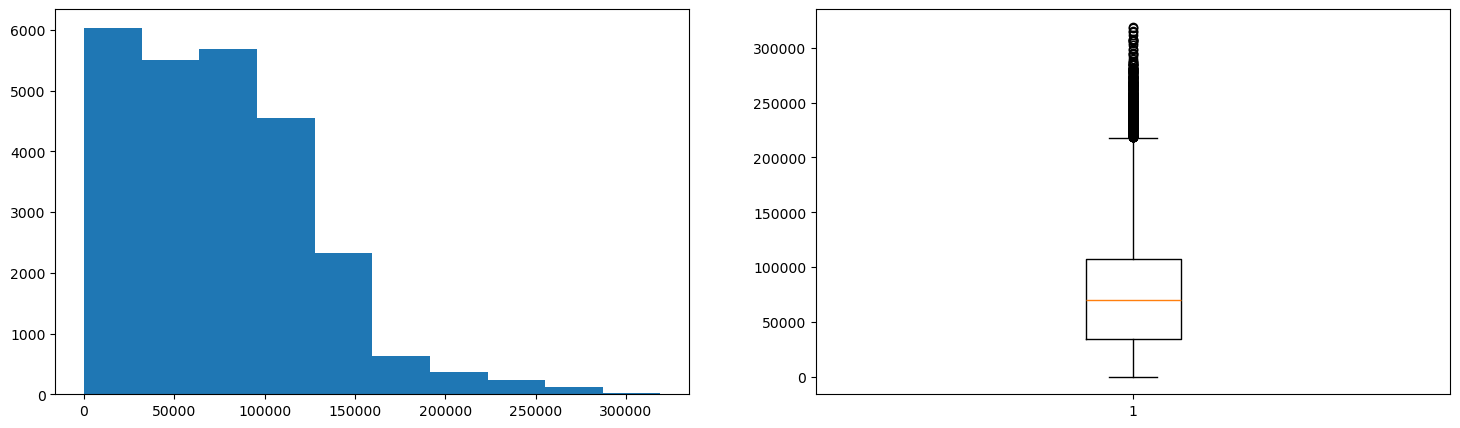

In [18]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- Outliers are available less than q1-1.5*IQR

- Outliers are available greater than q3+1.5*IQR

- Step1:

    - Calculate Q1
    - Calculate Q3
    - Calculate IQR: Q3-Q1

- Step2:

    - LB= Q1-1.5*IQR
    - UB= Q3+1.5*IQR

- Step3:

    - con1= visa_df['prevailing_wage']<LB
    - con2= visa_df['prevailing_wage']<UB
    - apply 'OR' operator and get outliers data
 
  

**Outliers data**

In [24]:
Q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)

IQR = Q3-Q1

LB = Q1-1.5*IQR
UB = Q3+1.5*IQR

con1 = visa_df['prevailing_wage'] < LB
con2 = visa_df['prevailing_wage'] > UB

outliers_data = visa_df[con1 | con2]


In [25]:
len(outliers_data)

427

**Non-Outliers data**

In [28]:
Q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)

IQR = Q3-Q1

LB = Q1-1.5*IQR
UB = Q3+1.5*IQR

con1 = visa_df['prevailing_wage'] > LB
con2 = visa_df['prevailing_wage'] < UB

non_outliers_data = visa_df[con1 & con2]

In [29]:
len(non_outliers_data)

25053

In [30]:
25053+427

25480

**Histogram & Boxplot for non-outliers data**

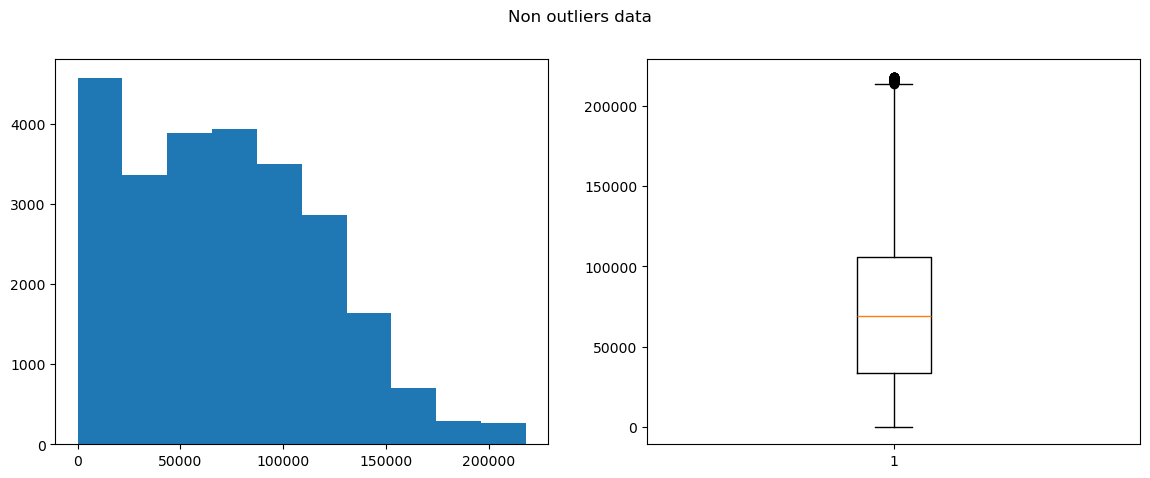

In [32]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) ## 25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])  ## 25053
plt.show()

**Comparing total data with non outliers data**

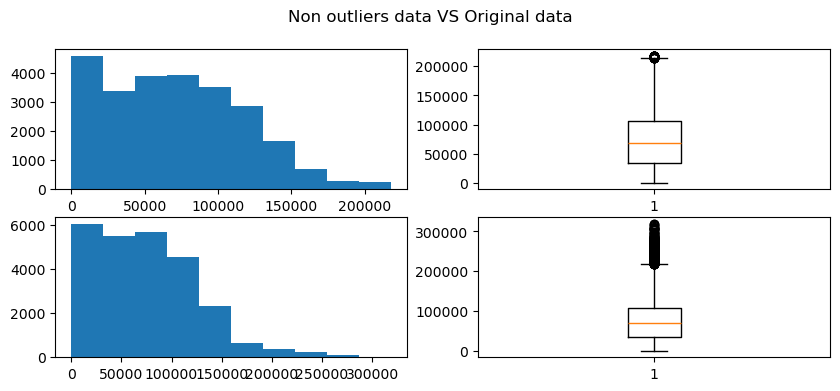

In [44]:
plt.figure(figsize=(10,4))   ##10 units in x-axis & 4 units in y-axis

plt.suptitle('Non outliers data VS Original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage']) ## 25053
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])  ## 25053

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])

plt.show()

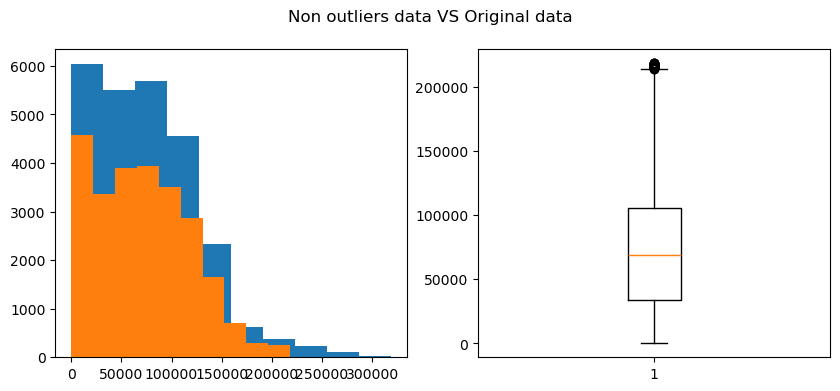

In [46]:
plt.figure(figsize=(10,4))

plt.suptitle('Non outliers data VS Original data')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()


**How to deal with the Outliers**

**Method-1: Drop the outliers**

    - drop outliers is not good idea
    - when you drop outliers, data will be lost
    - for e.g. here we are dropping 427 rows
    - x% of 25480=427
    - 1.7% data, here it is fine we can drop the outlier

**Method-2: Fill with median value**

    - we already know that outliers does not affect median
    - so we can fill outliers by median

**Method-3: Cap the values with Q1 and Q3**

    - all less than bound values we can replace with q1 or LB
    - all greater than upper bound values we can replace with q3 or UB
    

**Fill with Median**

- create empty list
- calculate median value: visa df['prevailing_wage'].median()
- iterate through visa df['prevailing_wage'].values
- if each value i.e. 'i', < LB or > UB then append with median values
- else append with i value
  

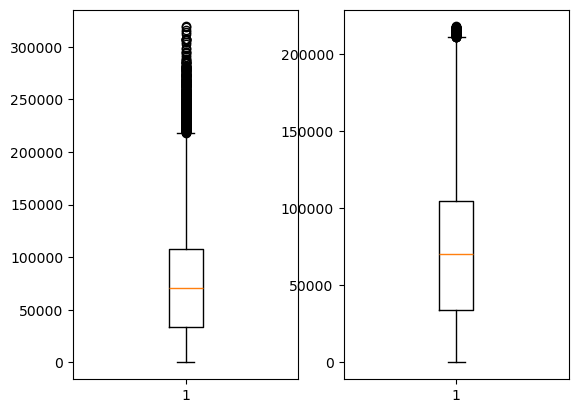

In [56]:
li = []

median_value = visa_df['prevailing_wage'].median()

Q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)

IQR = Q3-Q1

LB = Q1-1.5*IQR
UB = Q3+1.5*IQR

for i in visa_df['prevailing_wage'].values:
    if i < LB or i > UB:
        li.append(median_value)
    else:
        li.append(i)

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = li

plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])

plt.show()

**np.where**

- np.where is used for binary condition
- it has 3 arguments
    - condition
    - value if condition is True
    - value if condition is False

In [62]:
d={"sub":["DS","ML","CS"],
  "Marks":[100,150,20]}
data=pd.DataFrame(d)

# Marks column should be replaced with 1 when value > 100
# Else same value
# Marks     Marks
# 100       100
# 150        1
# 20        20


In [61]:
con = data['Marks']>100
l = np.where(con,1,data['Marks'])
# if condition True then replace with :1
# if condition False then replace with :data['Marks']
l

array([100,   1,  20], dtype=int64)